In [29]:
## This file is meant to be run only once
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
from shapely.geometry import Polygon
import geopandas as gpd
import os.path
from PIL import Image
import rasterio
import math

# read in all of your files #TODO make sure these match your file path
os.chdir("/Users/aminaly/Box Sync/mountain_biodiversity")

In [ ]:
kba = gpd.read_file(os.getcwd() + "/data/KBA/KBA2020/KBAsGlobal_2020_September_02_POL.shp")
gmba = gpd.read_file(os.getcwd() + "/data/GMBA/GMBA_Inventory_V2_210420_GME/GMBA_Inventory_V2_210420_GME.shp")

## rasterized version of mountain ranges 
#Image.MAX_IMAGE_PIXELS = 933120000
#mountain = Image.open(os.getcwd() + "/data/WDPA/K1_binary_from_WCMC_2021.tiff")
#mountain.show()

In [54]:
#### read in and combine all of the wdpa files

## read in all the wdpa files
wdpa0 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_0/WDPA_May2021_Public_shp-polygons.shp")
wdpa1 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_1/WDPA_May2021_Public_shp-polygons.shp")
wdpa2 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_2/WDPA_May2021_Public_shp-polygons.shp")
wdpa3 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_0/WDPA_May2021_Public_shp-points.shp")
wdpa4 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_1/WDPA_May2021_Public_shp-points.shp")
wdpa5 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_2/WDPA_May2021_Public_shp-points.shp")

#combine the poly and point dataframes
wdpa_poly = gpd.GeoDataFrame(pd.concat([wdpa0, wdpa1, wdpa2]))
wdpa_point = gpd.GeoDataFrame(pd.concat([wdpa3, wdpa4, wdpa5]))

#save these out so we don't have to re-run again
wdpa_poly.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_shp-polygons.shp", driver='ESRI Shapefile')
wdpa_point.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_shp-points.shp", driver='ESRI Shapefile')

wdpa_poly.crs = {'init': 'epsg:4326', 'no_defs': True}
wdpa_point.crs = {'init': 'epsg:4326', 'no_defs': True}


In [56]:
#### Take in points and create buffers around them based on reported area

## Add buffers to the point based on their area
wdpa_point.crs = {'init': 'epsg:3763', 'no_defs': True}
wdpa_point.to_crs({'init': 'epsg:3763'})

## calculate the radius
wdpa_point['radius'] = np.sqrt(wdpa_point.REP_AREA / np.pi )

## remove entries with 0 reported area/radius
wdpa_point.drop(wdpa_point[wdpa_point['radius'] <= 0].index, inplace = True)

## create the buffers
wdpa_point['geometry'] = wdpa_point.geometry.buffer(wdpa_point.radius)

# convert projection back
wdpa_point.crs = {'init': 'epsg:4326', 'no_defs': True}
wdpa_point.to_crs({'init': 'epsg:4326'})

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry,radius
36,555547752.0,555547752,1,Vena Island,Vena Island,Marine Protected Area,Marine Protected Area,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,1686,Not Reported,SLB,SLB,Not Applicable,Not Applicable,"POLYGON ((158.93587 -8.50831, 158.93149 -8.597...",0.909728
84,127846.0,127846,1,Ballymacoda,Ballymacoda,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Management plan is not implemented and not ava...,State Verified,1856,IE-C,IRL,IRL,Not Applicable,Not Applicable,"POLYGON ((-6.82412 51.86667, -6.82938 51.75958...",1.092548
122,220063.0,220063,1,Isla Santay,Isla Santay,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii)(iii)(iv)(vii)(viii),...,Management plan is not implented and not avail...,State Verified,1856,EC-G,ECU,ECU,Not Applicable,Not Applicable,"POLYGON ((-75.98005 -2.21667, -75.99869 -2.595...",3.869946
134,900593.0,900593,1,Annaiwilundawa Tanks Sanctuary,Annaiwilundawa Tanks Sanctuary,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(i)(ii)(iii)(iv)(vii)(viii),...,Management plan is available but not implemented,State Verified,1856,Not Reported,LKA,LKA,Not Applicable,Not Applicable,"POLYGON ((81.92541 7.70000, 81.91525 7.49331, ...",2.108741
253,902815.0,902815,1,Nakaumi,ä¸­æµ·,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(v)(vi),...,Management plan is implemented and is available,State Verified,1856,JP-31:JP-32,JPN,JPN,Not Applicable,Not Applicable,"POLYGON ((138.29314 35.46667, 138.26878 34.970...",5.059809


In [1]:
#find the WDPAIDs that have points in the same protected area
poly_in_point = wdpa_poly[wdpa_poly['WDPA_PID'].isin(wdpa_point.WDPA_PID)]
point_in_poly = wdpa_point[wdpa_point['WDPA_PID'].isin(poly_in_point.WDPA_PID)]

#find those that have no overlaps (no need to do any dissolving)
poly_not_point = wdpa_poly[~wdpa_poly['WDPA_PID'].isin(wdpa_point.WDPA_PID)]
point_not_poly = wdpa_point[~wdpa_point['WDPA_PID'].isin(poly_in_point.WDPA_PID)]

#get two shapefiles. One with all the overlaps, and one without
overlaps = gpd.GeoDataFrame(pd.concat([poly_in_point, point_in_poly]))
non_overlaps = gpd.GeoDataFrame(pd.concat([poly_not_point, point_not_poly]))

NameError: name 'wdpa' is not defined

In [ ]:
## dissolve the overlaps 
dissolved_overlaps = overlaps.dissolve(by='WDPAID', aggfunc = 'sum')

## combine non-overlaps with dissolved overlaps
wdpa_final = gpd.GeoDataFrame(pd.concat([dissolved_overlaps, non_overlaps]))

wdpa_final.crs = {'init': 'epsg:4326', 'no_defs': True}
wdpa_final.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_flattened.shp", driver='ESRI Shapefile')

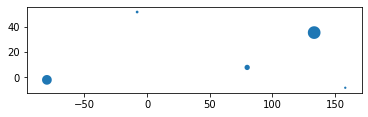

In [73]:
wdpa_poly = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_shp-polygons.shp", driver='ESRI Shapefile')

combined = gpd.GeoDataFrame(pd.concat([wdpa_poly, wdpa_point]))
dissolved_overlaps = combined.dissolve(by='WDPAID', aggfunc = 'sum')


TypeError: 'dict' object is not callable

In [ ]:
wdpa0 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_0/WDPA_May2021_Public_shp-polygons.shp")
wdpa1 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_1/WDPA_May2021_Public_shp-polygons.shp")
wdpa2 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_2/WDPA_May2021_Public_shp-polygons.shp")

#combine the poly and point dataframes
wdpa_poly = gpd.GeoDataFrame(pd.concat([wdpa0, wdpa1, wdpa2]))

#save these out so we don't have to re-run again
wdpa_poly.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_shp-polygons.shp", driver='ESRI Shapefile')

wdpa_poly.crs = {'init': 'epsg:4326', 'no_defs': True}
